<a href="https://colab.research.google.com/github/yjw123456/SEEM2460-SVM/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Outline**
* Login to google colaboratory
* Basic operations of numpy
* A brief review of support vector machine
* Implementation of Support Vector Machine using numpy and cvxpy
* Other classifier such as logistic regression




* **Get start**

     Please go the website https://colab.research.google.com/notebooks/intro.ipynb#recent=true

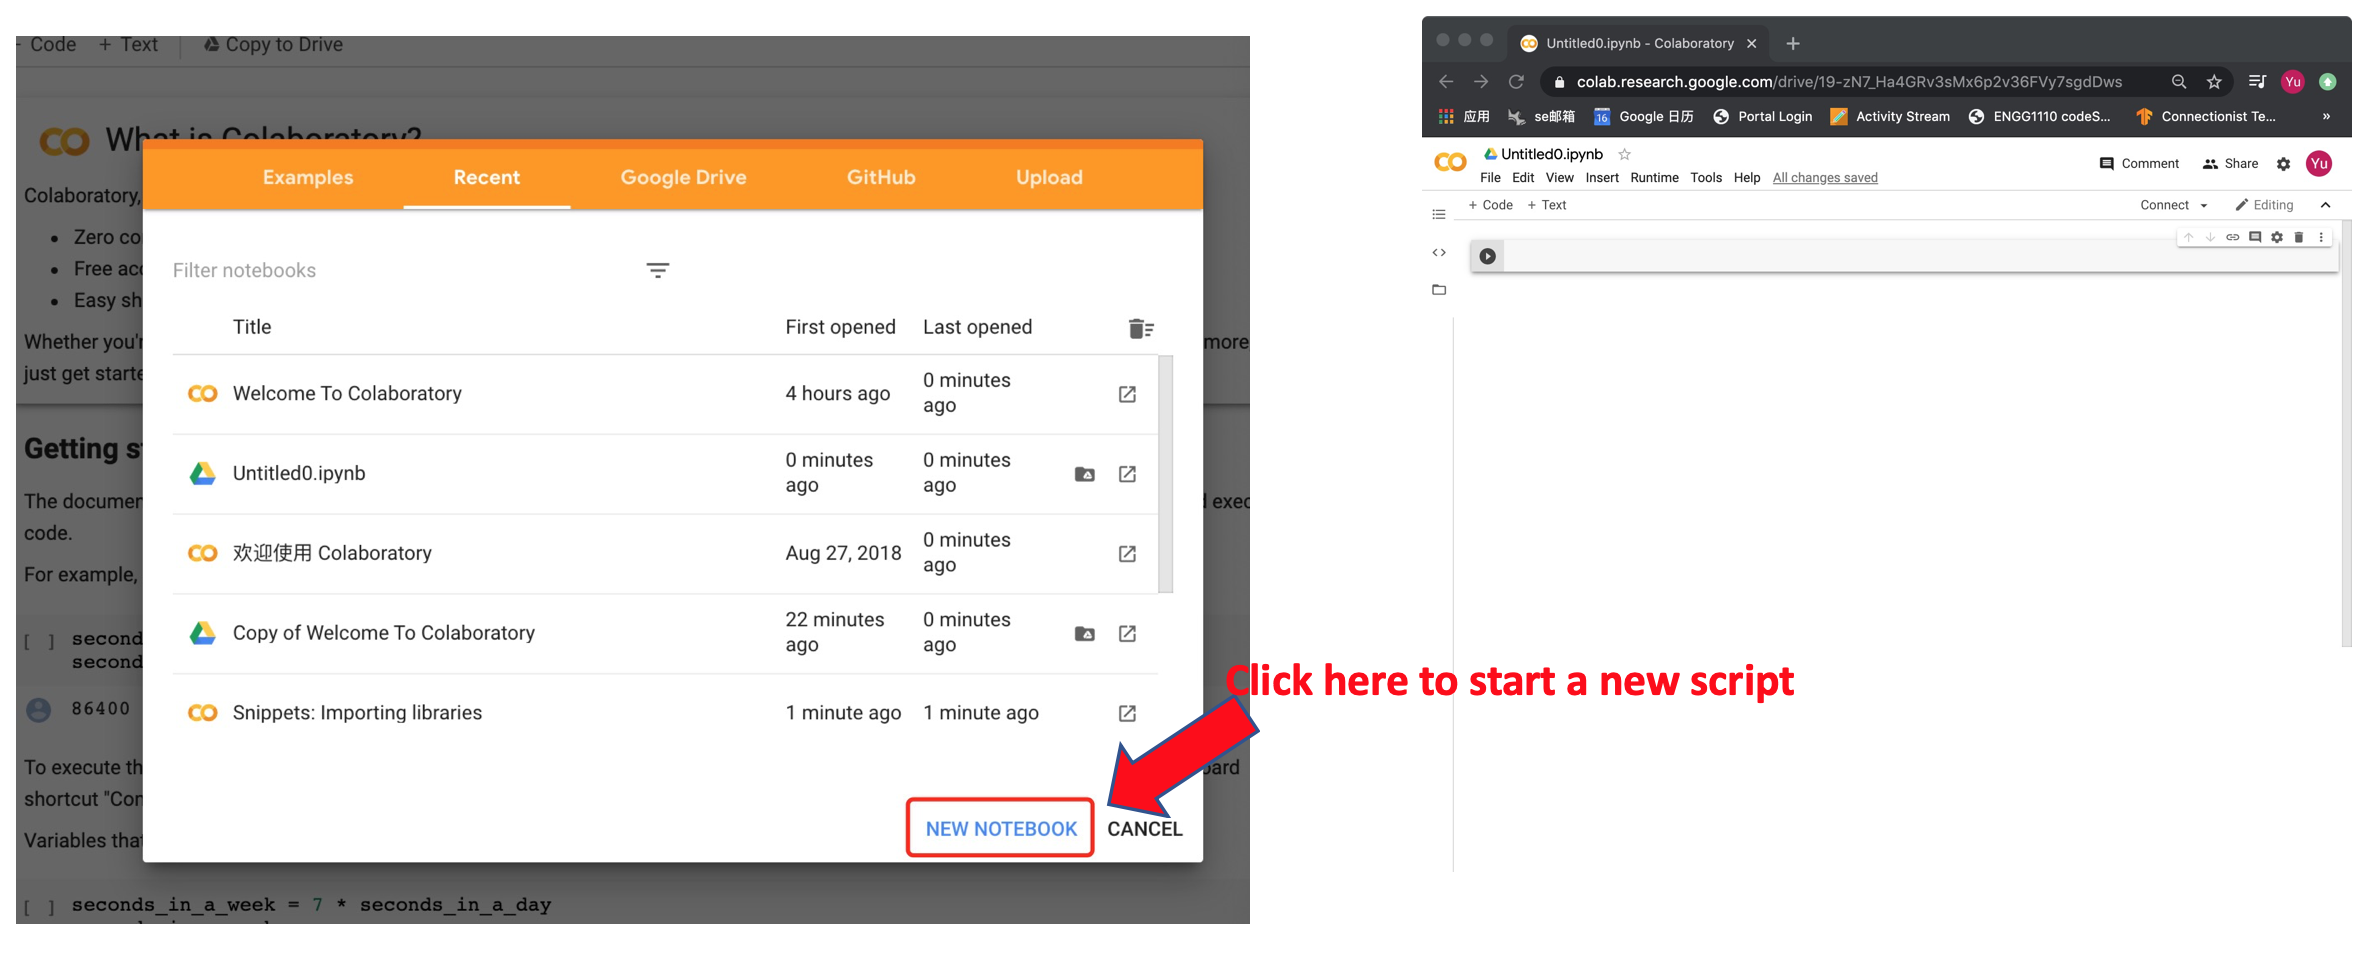


---
* Define matrix A

\begin{equation}
A = 
\begin{pmatrix}
1 & 2 & 3\\
4& 5 & 6 \\
7  & 8 &9\\
\end{pmatrix}
\end{equation}

In [0]:
# Basic operations of numpy
# First you need to enable numpy in your python
import numpy as np 
# Define an array
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
# View the shape of matrix A
A_shape = A.shape
# Get the first row of matrix a
row_a_0 = A[0,:]
# Get the second column of matrix a
col_a_2 = A[:,1]
# Get the entry of matrix
entry_12 = A[1,2]
print("Matrix A: \n {} ".format(A))
print("shape: {} | row_a_0: {} | col_a_2: {} | entry_12: {}".format(A_shape, row_a_0,col_a_2, entry_12))

Matrix A: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
shape: (3, 3) | row_a_0: [1 2 3] | col_a_2: [2 5 8] | entry_12: 6


---
* Matrix Product
\begin{equation}
AB = 
\begin{pmatrix}
1 & 2 & 3\\
4& 5 & 6 \\
7  & 8 &9\\
\end{pmatrix}
\begin{pmatrix}
1 & 2\\
4& 5  \\
7& 8\\
\end{pmatrix}=
\begin{pmatrix}
30 & 36\\
66& 81  \\
102& 126\\
\end{pmatrix}
\end{equation}

In [0]:
# Matrix production
B = np.array([[1,2],
              [4,5],
              [7,8]])

b = np.array([1,4,7])

AB = np.dot(A,B)

Ab = np.dot(A,b)
print("A*b = \n",Ab)
print("A*B = \n",AB)

A*b = 
 [ 30  66 102]
A*B = 
 [[ 30  36]
 [ 66  81]
 [102 126]]


---
* Matrix Transpose
\begin{equation}
B^{T} = 
\begin{pmatrix}
1 & 2\\
4& 5  \\
7& 8\\
\end{pmatrix}^T=
\begin{pmatrix}
1 & 4 & 7\\
2& 5  & 8  \\
\end{pmatrix}
\end{equation}

In [0]:
# Matrix Transpose
BT = B.T
print("B transpose = \n", BT)

* Concatenations
\begin{equation}
[A,B] = 
\begin{pmatrix}
1&2&3&1 & 2\\
4&5&6&4& 5  \\
7&8&9&7& 8\\
\end{pmatrix}
\end{equation}

In [0]:
# Concatenations
concat_AB = np.concatenate((A,B),axis=1)
print(concat_AB)

# Define some special matrices
zero_m = np.zeros([3,3]) # each entry equals to 0
ones_m = np.ones([4,5])  # each entry equals to 1
rand_m = np.random.normal(0,1, size=(2,5)) # each entry is sampled from a noraml distribution with mean 0 variance 1
# print("zero_m = \n {}\nones_m = \n {}\nrand_m = \n {}".format(zero_m, ones_m, rand_m))

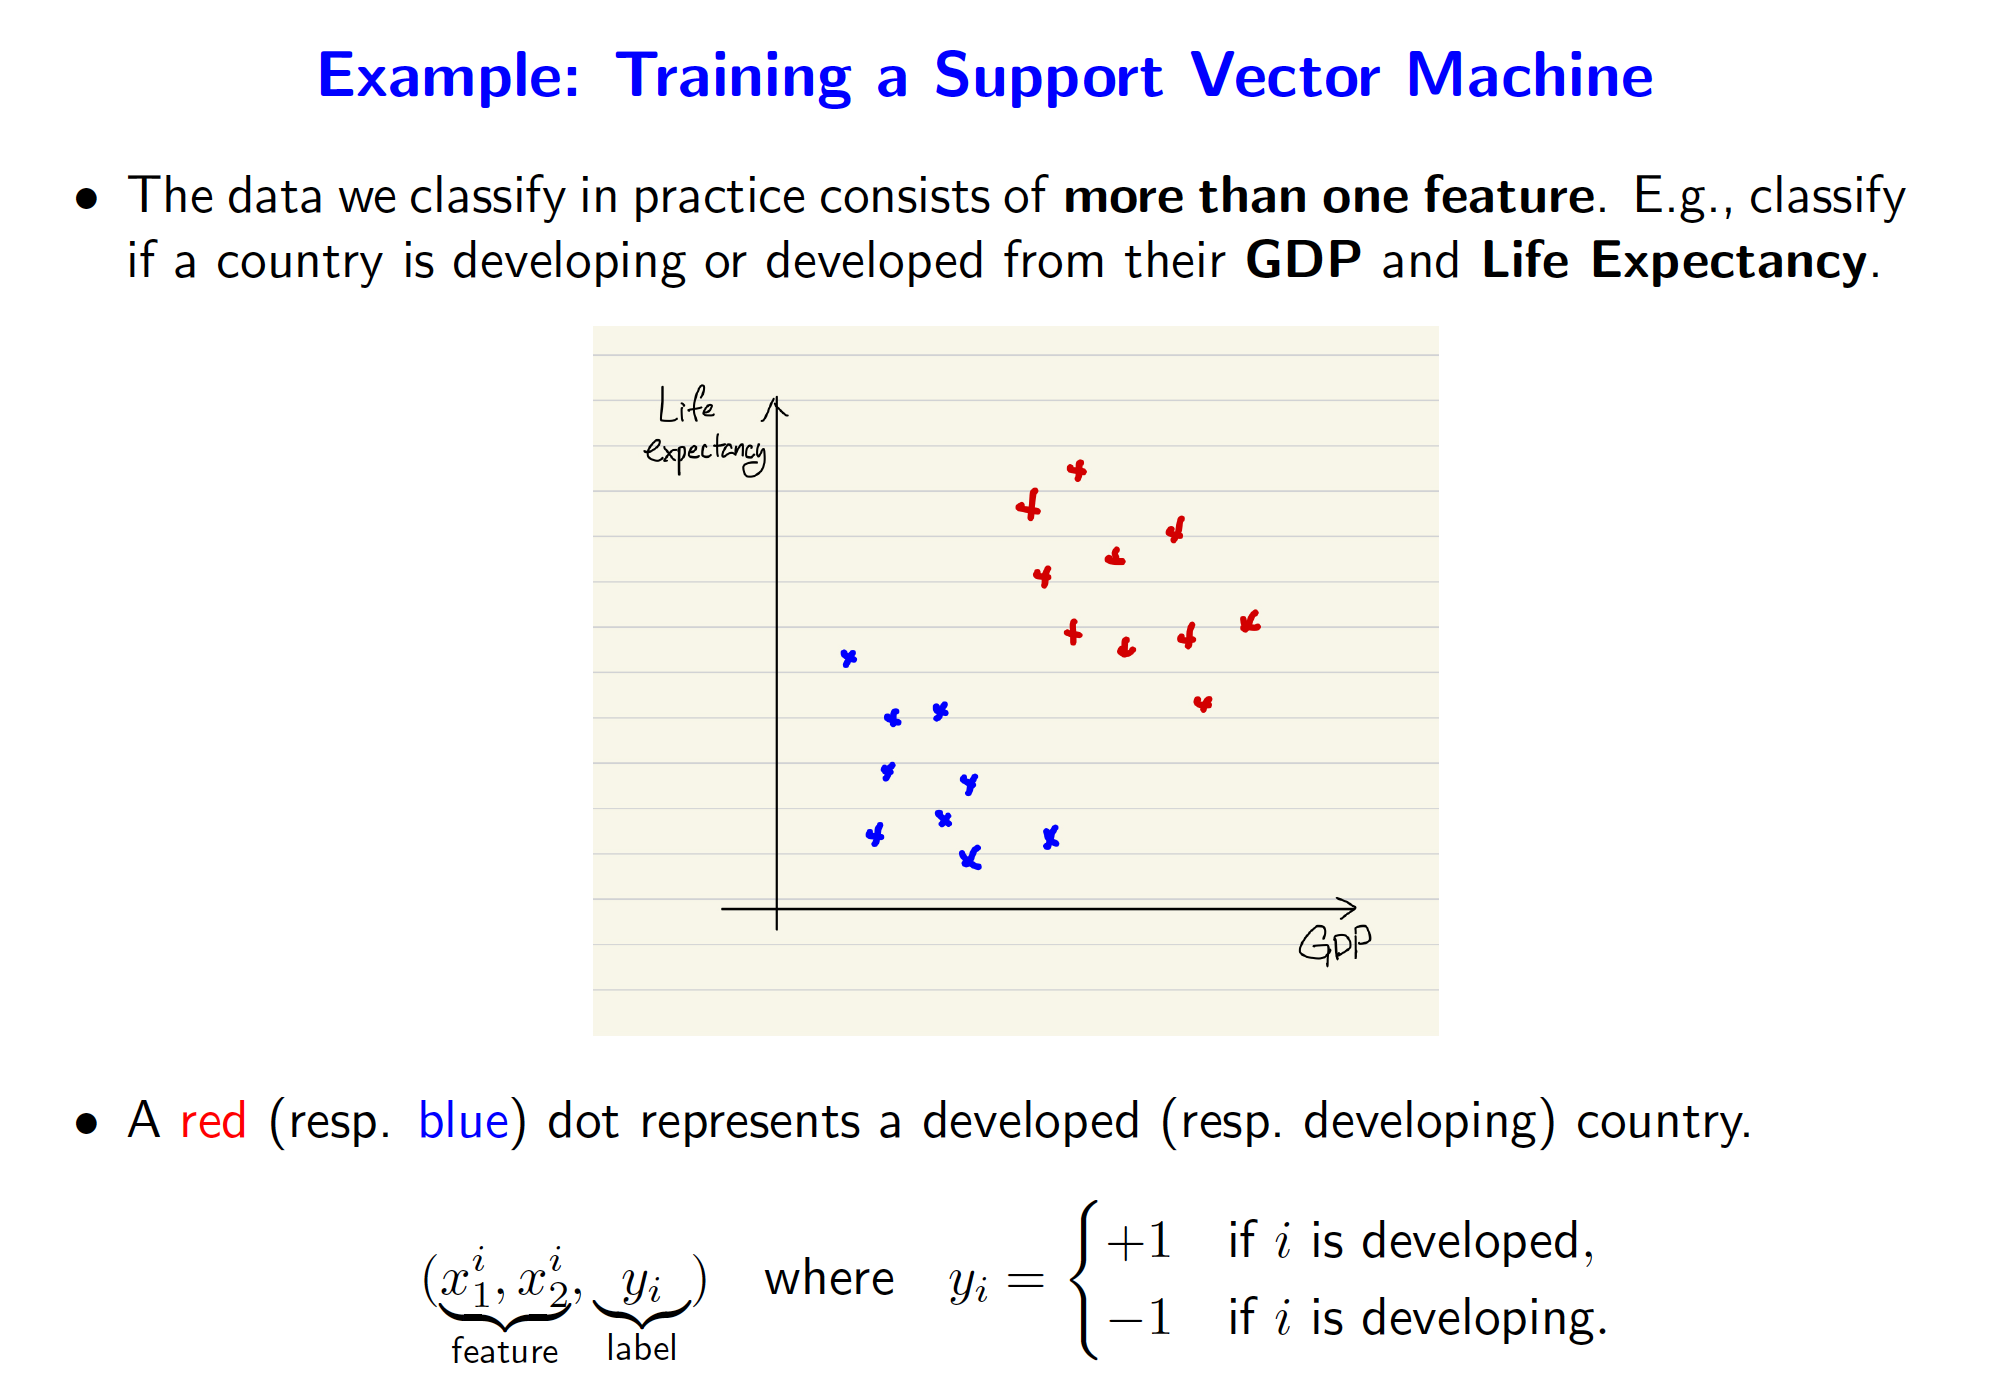

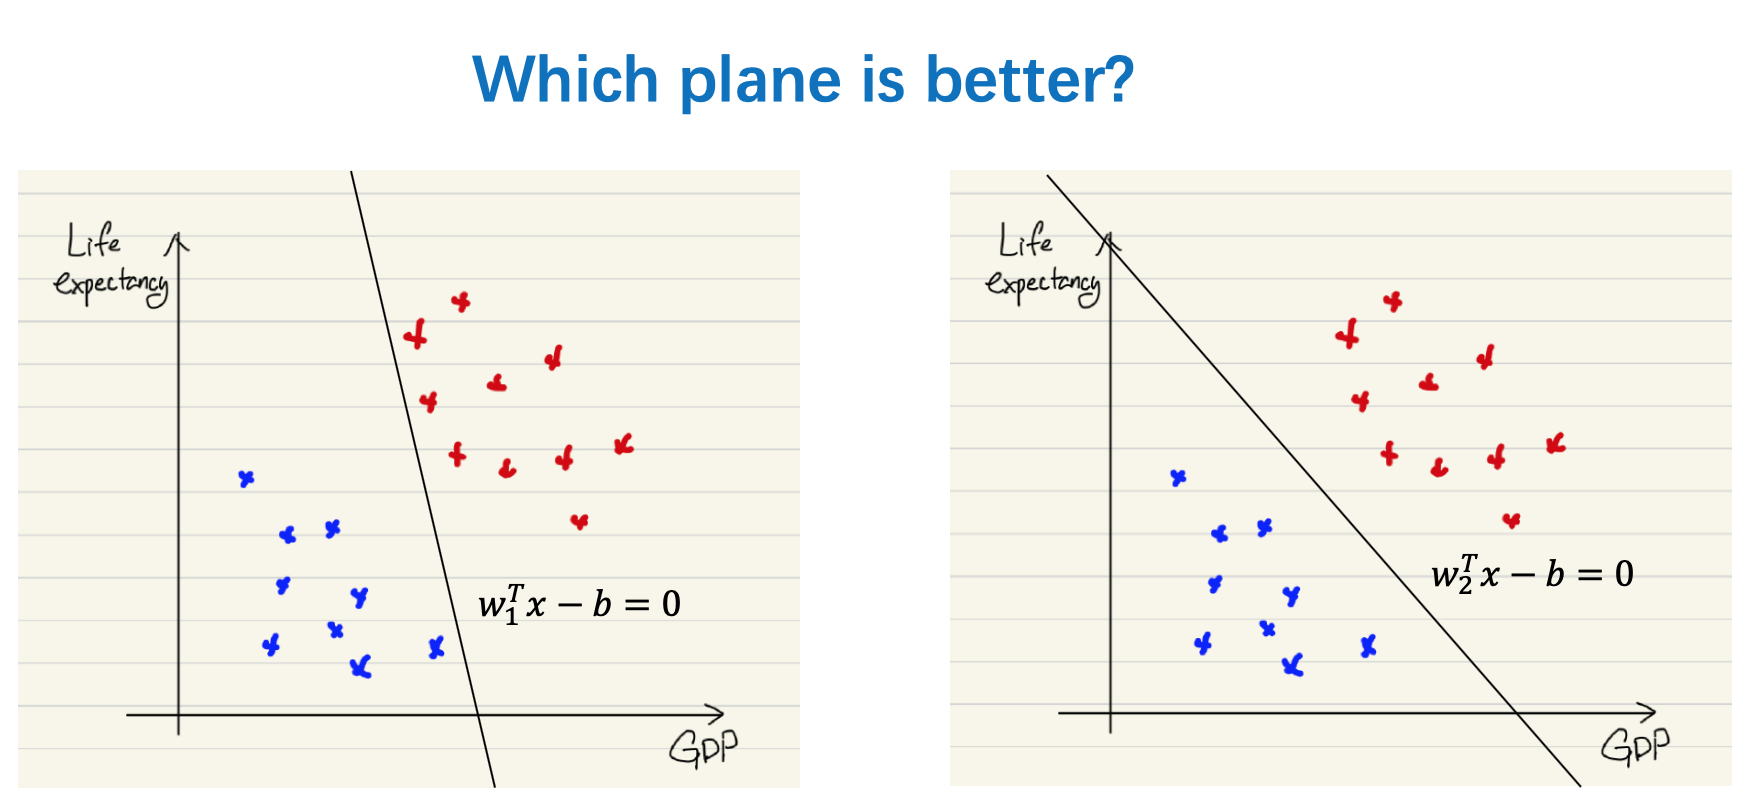

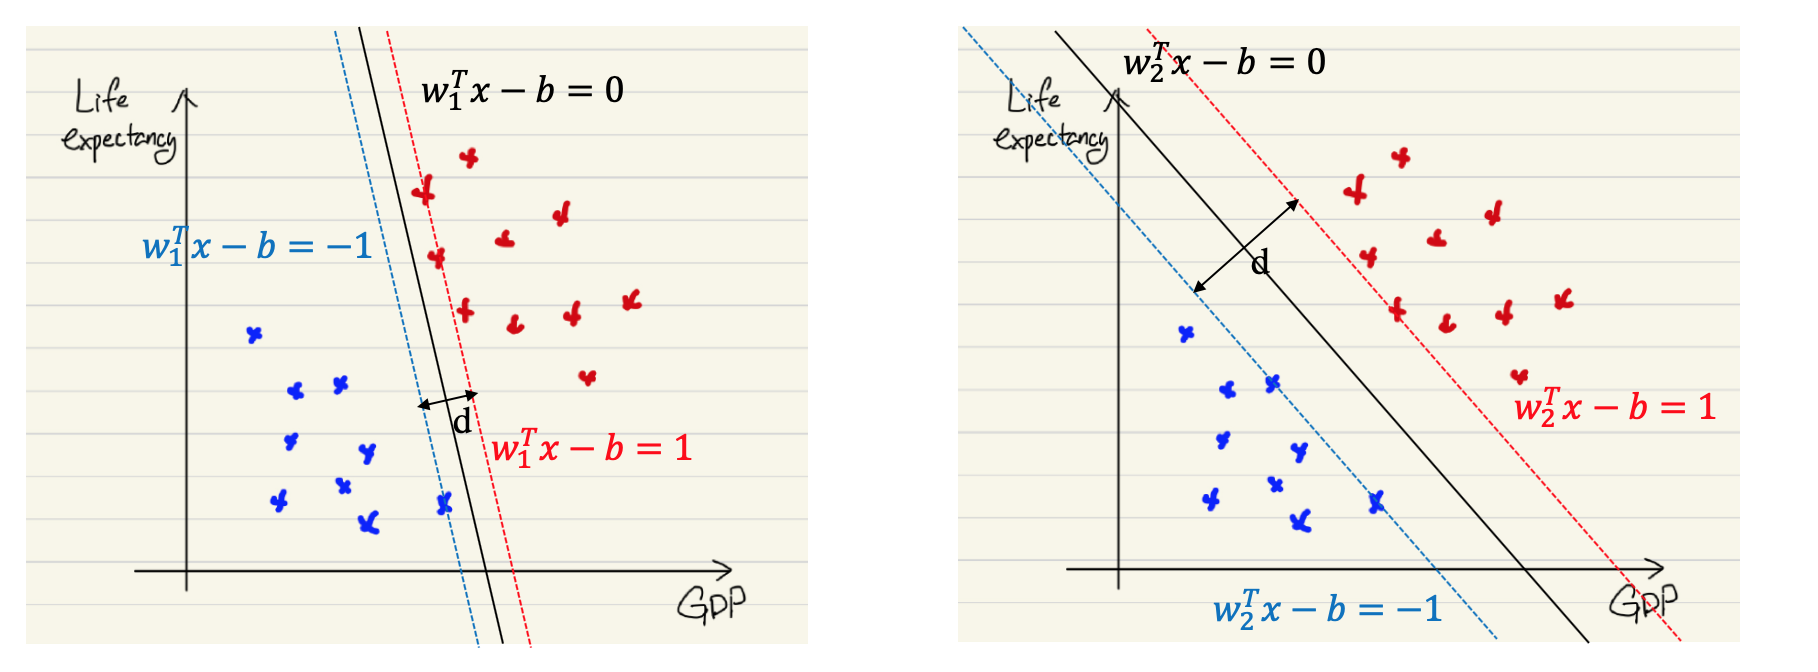

* We want to maximize the value of $d$
\begin{equation}
 \max_{w,b} d
\end{equation}

\begin{equation}
 where: d = \frac{2}{\sqrt{w^Tw}}
\end{equation}

* The constrain is for $x_i$ above line $w^Tx_i-b=1$, we have $y_i=1$ and for $x_i$ below line $w^Tx_i-b=-1$, we have $y_i=-1$, this can be expressed as:
\begin{equation}
 y_i(w^T x_i - b) \geq1, i=1, 2, ..., N
\end{equation}

* We can refomulate the objective as:
\begin{equation}
 \min_{w,b} \frac{1}{2}w^Tw \\
 s.t.      y_i(w^T x_i - b) \geq1, i=1, 2, ..., N
\end{equation}




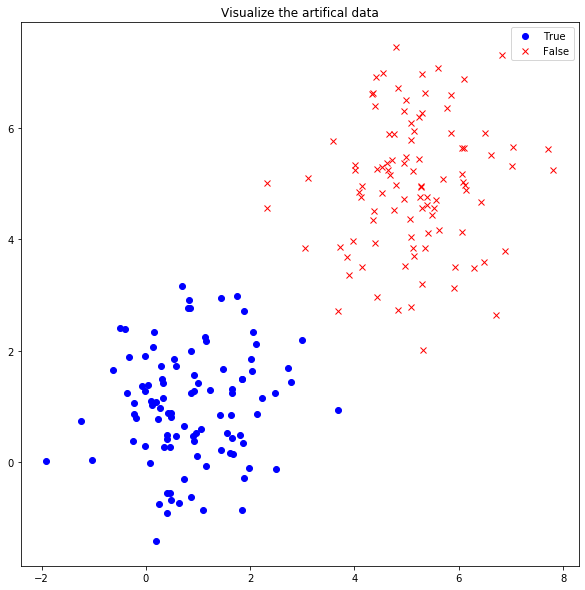

In [0]:
import numpy as np
import cvxpy as cp

# Generate and visualize data
# 2D example
np.random.seed(3) 

n = 2 # dimension of the feature i.e. GDP and Life Expectancy
m = 100 # number of training

X_true = np.random.normal(1,1, size=(m,n)) # feature
Y_true = np.ones(m) # lable

X_false = np.random.normal(5,1, size=(m,n)) 
Y_false = -np.ones(m)


from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(X_true[:,0], X_true[:,1], 'bo', label='True')
plt.plot(X_false[:,0], X_false[:,1], 'rx', label='False' )
plt.legend(loc='upper right')
plt.title('Visualize the artifical data')
plt.show()



---
* Support Vector Machines
\begin{equation}
 \min_{w,b} \frac{1}{2}w^Tw \\
 s.t.      y_i(w^T x_i - b) \geq1, i=1, 2, ..., N
\end{equation}


* Logistic cost function
\begin{equation}
 \min_{W,b} \frac{1}{N}\sum_{i=1}^{N}\log(1+exp(-y_i*(w^Tx-b))) + \rho(b^2+\rm norm(w)^2)
\end{equation}

\begin{equation}
 where:  norm(w)=\sqrt {\sum_{i,j}w_{ij}^2}
\end{equation}


* Mean square error function

\begin{equation}
  \min_{W,b} \frac{1}{N}\sum_{i=1}^{N}(y-(w^Tx-b))^2 + \rho(b^2+\rm norm(w)^2)
\end{equation}

Shape of the data: | Features: (200, 2) | Lables: (200, 1)
SVM: Optimal Weight:[-1.8426643  -1.40313618], bias:-9.58674902616835
Logistic Regression Optimal Weight:[-3.68194341 -3.8347563 ], bias:-21.630871161735065
Mean Square Error Weight:[-3.68194341 -3.8347563 ], bias:-21.630871161735065


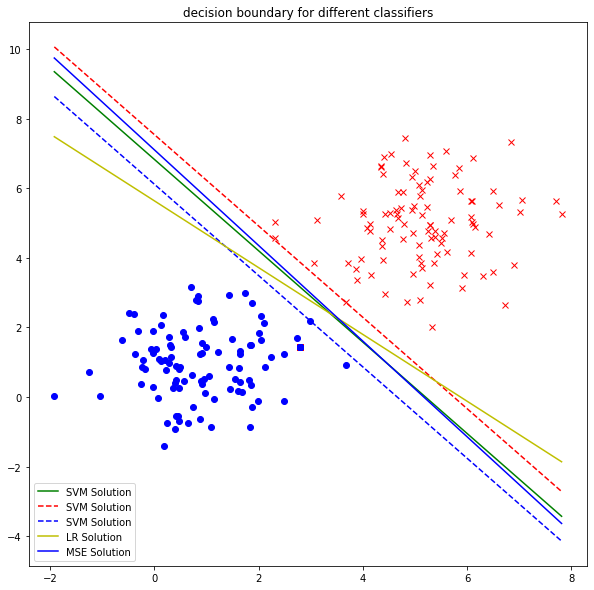

In [0]:
X = np.concatenate((X_true,X_false), axis=0)
Y = np.concatenate((Y_true,Y_false), axis=0)[:, None]
print("Shape of the data:", "| Features:",X.shape, "| Lables:",Y.shape) # visualize the shape of the data

########################################   Solution 1: SVM optimizer    ########################################
w_svm = cp.Variable((n,1))
b_svm = cp.Variable()

obj_svm = cp.Minimize(1/2*cp.norm(w_svm))
constrains=[cp.multiply(Y,(X*w_svm-b_svm))>=1]
prob_svm = cp.Problem(obj_svm,constrains)
prob_svm.solve()


######################################## Solution 2: Logistic regression ########################################
w_lr = cp.Variable((n,1))
b_lr = cp.Variable()

obj_lr = 0
for i in range(200):
    obj_lr += cp.logistic(-Y[i]*(w_lr.T*X[i]-b_lr))
prob_lr = cp.Problem(1.0/200 * cp.Minimize(obj_lr + 0.001*(cp.norm(w_lr)**2+cp.norm(b_lr)**2)))
prob_lr.solve()

# ######################################## Solution 3: Mean square Error   ########################################
w_mse = cp.Variable((n,1))
b_mse = cp.Variable()

obj_mse = 0
for i in range(200):
    obj_mse += (w_mse.T * X[i] - b_mse - Y[i]) ** 2
prob_mse = cp.Problem(1.0/200 * cp.Minimize(obj_mse + 0.001*(cp.norm(w_mse)**2+cp.norm(b_mse)**2)))
prob_mse.solve()



# Show the results
print("SVM: Optimal Weight:{}, bias:{}".format(w_svm.value[:,0],b_svm.value))
print("Logistic Regression Optimal Weight:{}, bias:{}".format(w_lr.value[:,0],b_lr.value))
print("Mean Square Error Weight:{}, bias:{}".format(w_lr.value[:,0],b_lr.value))
xp = np.linspace(min(X[:,0]), max(X[:,0]), 100)


yp_svm = - (w_svm.value[0]*xp - b_svm.value)/w_svm.value[1]
yp_svm_f = - (w_svm.value[0]*xp - b_svm.value -1)/w_svm.value[1]
yp_svm_t = - (w_svm.value[0]*xp - b_svm.value + 1)/w_svm.value[1]


yp_lr = - (w_lr.value[0]*xp - b_lr.value)/w_lr.value[1]
yp_mse = - (w_mse.value[0]*xp - b_mse.value)/w_mse.value[1]



idx0 = np.where(Y==-1) 
idx1 = np.where(Y==1)
plt.figure(figsize=(10,10))
plt.plot(X[idx0, 0], X[idx0, 1], 'rx' )
plt.plot(X[idx1, 0], X[idx1, 1], 'bo')

plt.plot(xp, yp_svm, '-g', label="SVM Solution")
plt.plot(xp, yp_svm_t, '--r', label="SVM Solution")
plt.plot(xp, yp_svm_f, '--b', label="SVM Solution")

plt.plot(xp, yp_lr, '-y', label="LR Solution")
plt.plot(xp, yp_mse, '-b', label="MSE Solution")
plt.title('decision boundary for different classifiers')
plt.legend(loc='lower left')
plt.show()